In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
NNtitanic = pd.read_csv('titanic_dataset/train.csv')
Ntitanic.head()

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
##NUMERICAL EDA

In [8]:
#Categorical features that will be dropped
cat_feat=['Name','PassengerId','Ticket','Sex','Cabin','Embarked']
Ntitanic.drop(cat_feat,axis=1,inplace=True)
Ntitanic

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [9]:
Ntitanic.describe()
""""
We observe:
    Age missing values.
    In Survived the mean is telling us what percent of the people of this dataset survived.
""""

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
ti = pd.read_csv('titanic_dataset/train.csv')
ti['Sex'].count()
#ti.groupby('Survived').mean()

891

In [10]:
Ntitanic.groupby('Survived').mean()
#0 means the person didnt't survive and 1 the person survived.

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [16]:
#we want to check whether the missing values on age are missing randomly or are missing in a certain pattern 
#i.e if they didn't ask the age in 1st class.
Ntitanic.groupby(Ntitanic['Age'].isnull()).mean()
#true or false in age means if the age is missing or not

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [ ]:
##Now we start Plotting things

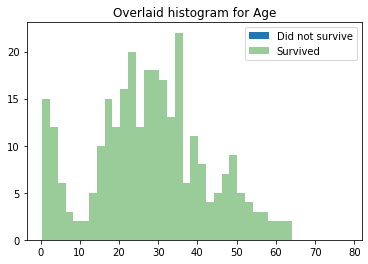

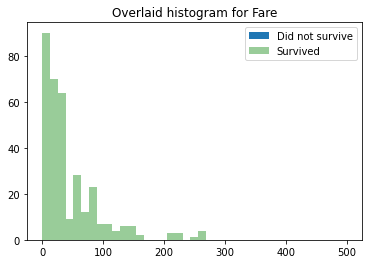

In [34]:
for i in['Age','Fare']:
    died = list(Ntitanic[Ntitanic['Survived'] ==0][i].dropna())
    survived = list(Ntitanic[Ntitanic['Survived'] ==1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died,color='r',kde=False, bins=np.arange(xmax,xmin,width))
    sns.distplot(survived,color='g',kde=False, bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survive','Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

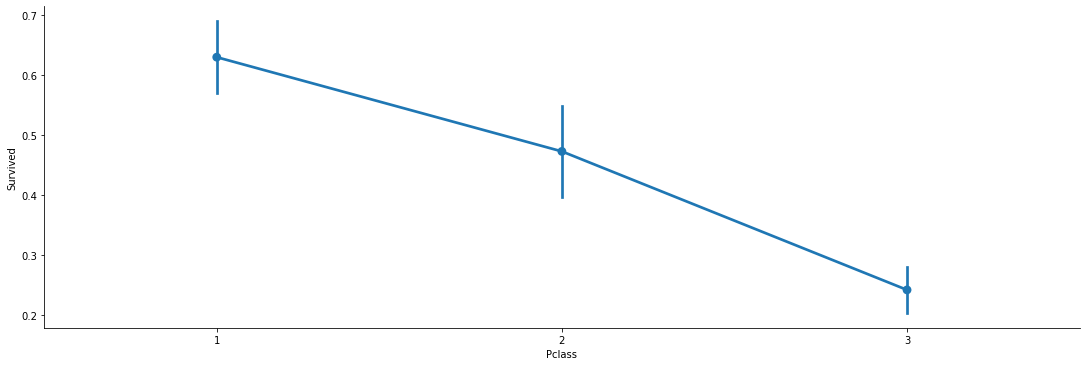

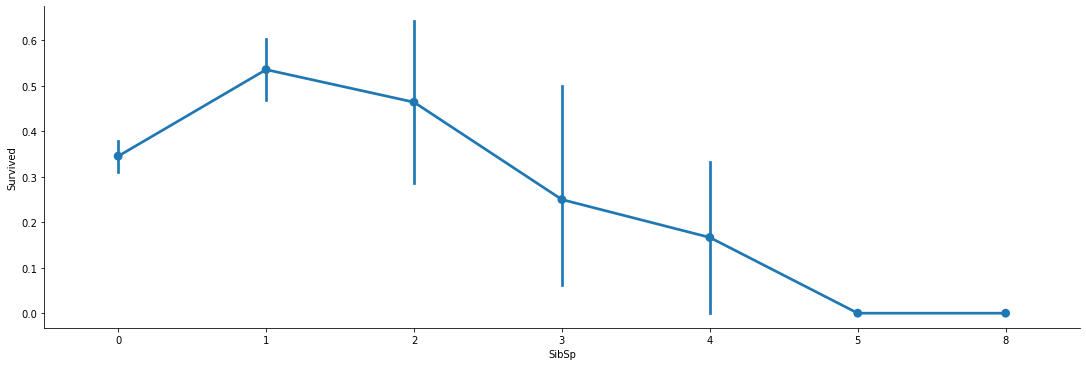

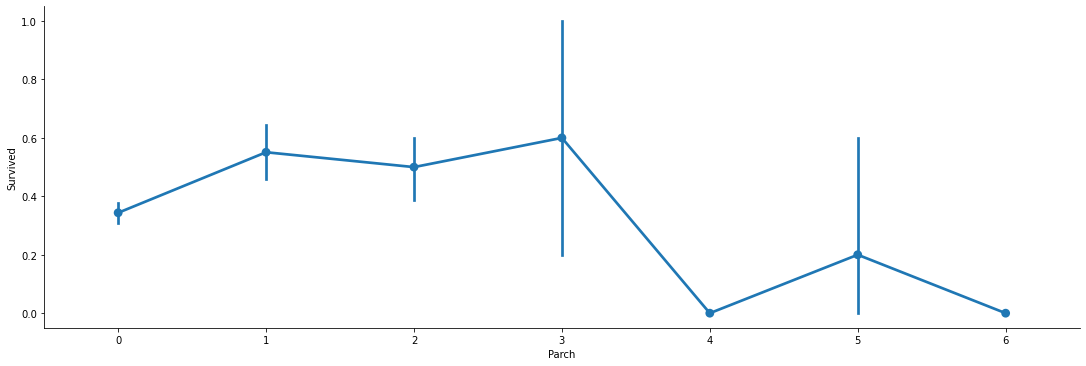

In [38]:
for col in['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col,y='Survived',data=Ntitanic,kind='point',aspect=3)
#aspect controls the size


<Figure size 432x288 with 0 Axes>

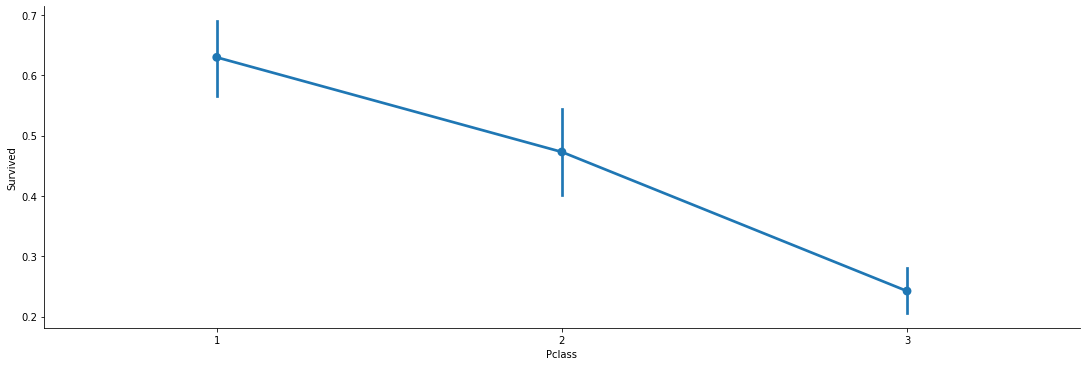

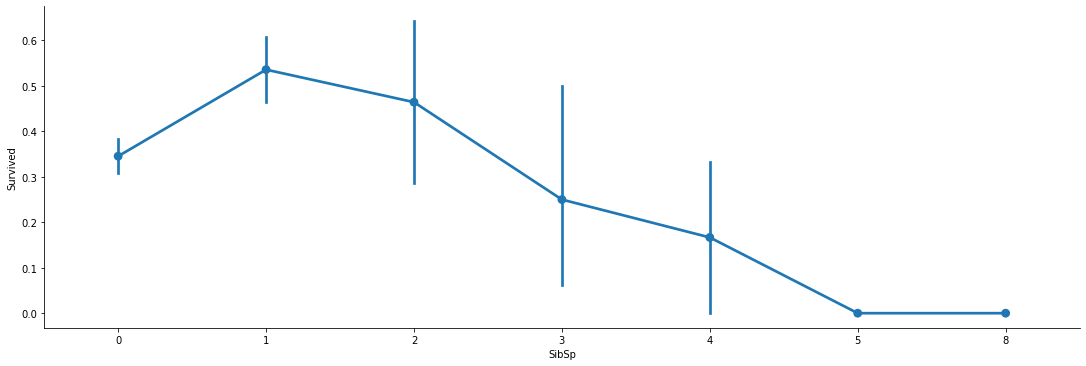

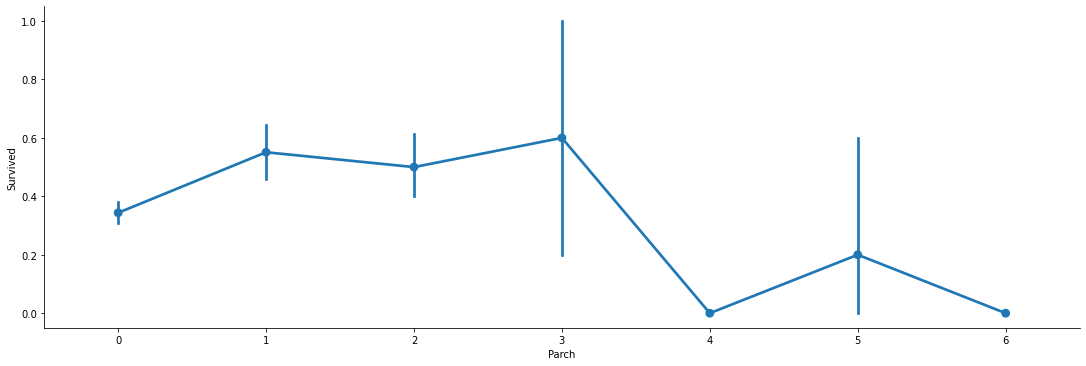

In [39]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=Ntitanic,kind='point',aspect=3)
    #vertical bar would be larger for fewer data

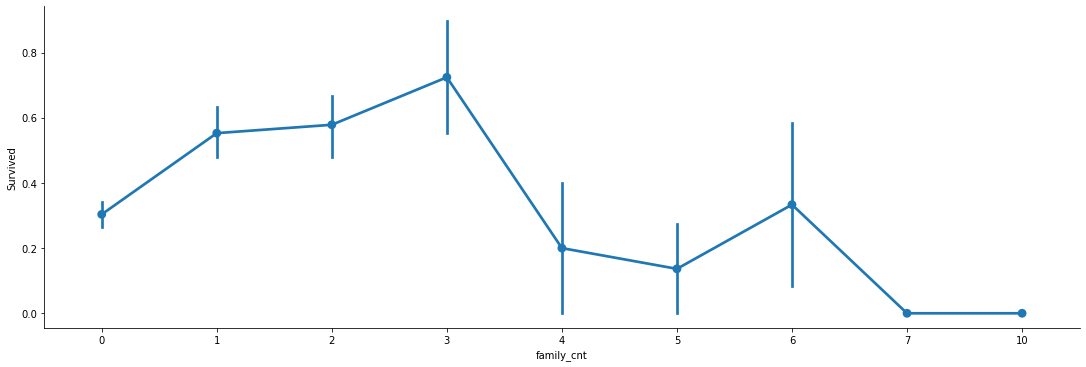

In [41]:
Ntitanic['family_cnt'] = Ntitanic['SibSp'] + Ntitanic['Parch']
sns.catplot(x='family_cnt',y='Survived',data=Ntitanic,kind='point',aspect=3)
#generally if you can combine 2 features in 1 and still maintain
#the same pattern it is usually a good idea to do so

In [42]:
Ntitanic

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,0,3,NaN,1,2,23.4500,3
889,1,1,26.0,0,0,30.0000,0


In [ ]:
#Time to perform some data cleaning

In [43]:
#We treat that age data is missing as random
Ntitanic.groupby(Ntitanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


In [44]:
#hence we will fill the missing values with the avearge
Ntitanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
Ntitanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
family_cnt    0
dtype: int64

In [49]:
#previously we combined SibSp and Parch hence we are removing 
#them in order to avoid Multicollinearity
Ntitanic.drop(['SibSp','Parch'],axis=1,inplace=True)

In [50]:
Ntitanic.tail()

,Survived,Pclass,Age,Fare,family_cnt
886,0,2,27.00000,13.00,0
887,1,1,19.00000,30.00,0
888,0,3,30.27259,23.45,3
889,1,1,26.00000,30.00,0
890,0,3,32.00000,7.75,0


In [ ]:
##CATEGORICAL EDA

In [53]:
Ctitanic = pd.read_csv('titanic_dataset/train.csv')
Ctitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
#Droping all continuous
cont_feat = ['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
Ctitanic.drop(cont_feat,axis=1,inplace=True)
Ctitanic.tail()

,Survived,Sex,Ticket,Cabin,Embarked
886,0,male,211536,NaN,S
887,1,female,112053,B42,S
888,0,female,W./C. 6607,NaN,S
889,1,male,111369,C148,C
890,0,male,370376,NaN,Q


In [58]:
#Exploring Sex, Cabin, Embarked
Ctitanic.info()
#A lot of missing values for cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [60]:
Ctitanic.groupby(Ctitanic['Cabin'].isnull()).mean()
#Cabin = True means it's missing
#Result: there is a really dramatic split between those who are missing a 
#cabin value and survived and those who had a cabin value and didn't survive.

,Survived
Cabin,
False,0.666667
True,0.299854


In [61]:
#Normally we would have dropped the column but we found an important source
#of information: the missing cabin tells us something!
Ctitanic['Cabin_ind'] = np.where(Ctitanic['Cabin'].isnull(), 0, 1)
Ctitanic.head(9)
#if a cabin was missing we put 0 else 1

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0


In [ ]:
#Plotting

<Figure size 432x288 with 0 Axes>

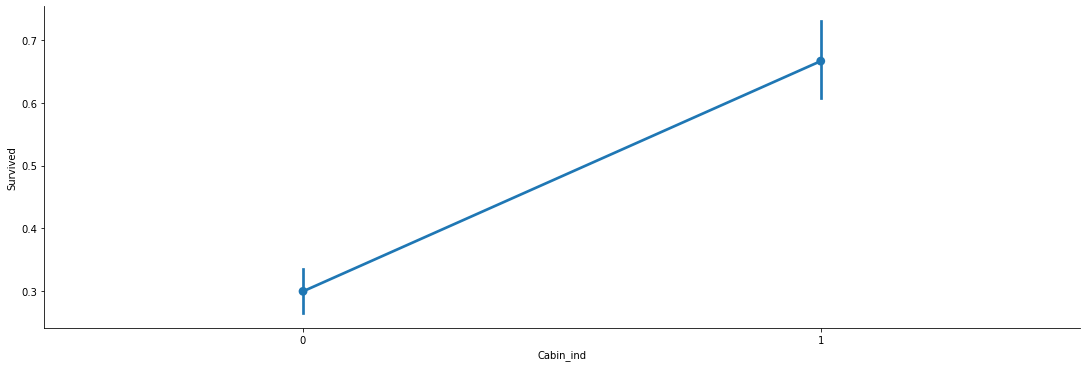

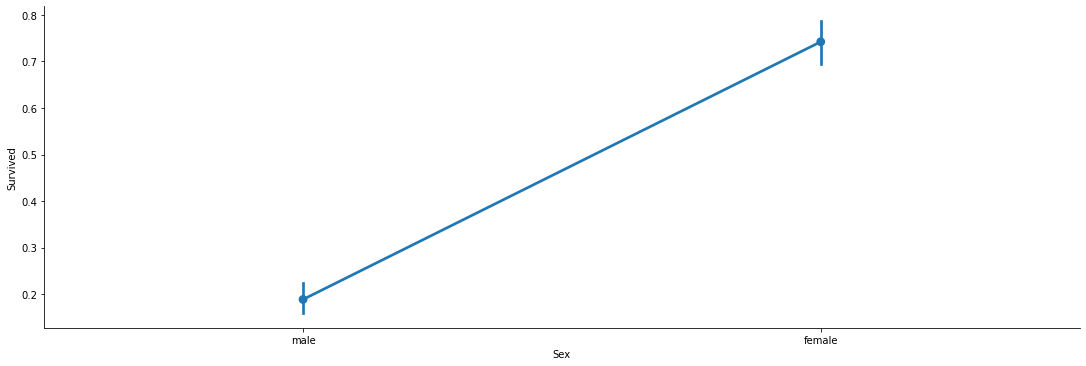

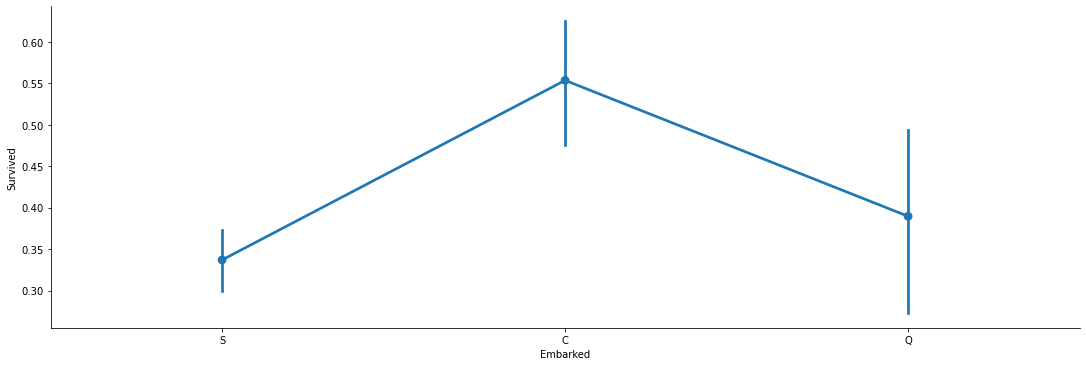

In [62]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=Ctitanic,kind='point',aspect=3)

In [63]:
#The relationships of Cabin_ind-Survivability and Sex-Survivability are clear
#We must critically think about the Embarked; maybe more men embarked in S
#or people that embarked in C had more cabins(cabin_ind = 0)
#We will use pivot tables to search at those potential relationships.
Ctitanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')
#the default aggregession fucntion is mean

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [64]:
#way more males boarded on S and that explains low survivability in S
Ctitanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [ ]:
#for Q there are approx. 15 times more people with cabins than without cabins
#in S there is approx. 3 times more people with cabins.
#In C there are more people without cabins and this explains the high survivability

In [ ]:
#Summarizing: we can explain the Embarked plot by; 
    #In S way more males boarded
    #In C way more people had cabins.
#Hence Cabin feature doesn't provide very useful information.

In [ ]:
##SUMMARIZING THE KNOWLEDGE SO FAR

In [2]:
titanic = pd.read_csv('titanic_dataset/train.csv')
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [4]:
#converting sex to numerical
gender_num = {'male': 0, 'female':1} #creating dictionary
'''
This is how you could one-hot encode 
titanic['Male'] = titanic['Sex'].where(titanic['Sex'] == 'male',1,0)
titanic['Female'] = titanic['Sex'].where(titanic['Sex'] == 'female',1,0)
titanic['other'] = titanic['Sex'].where(titanic['Sex'] == 'other',1,0)

titanic.drop('Sex', axis=1, inplace=True)
'''
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [5]:
titanic.drop(['Cabin', 'Embarked'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,0


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin_ind        0
dtype: int64

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [12]:
titanic['Family_Cnt'] = titanic['Parch'] + titanic['SibSp']
titanic.drop(['Parch','SibSp','PassengerId'],axis=1,inplace=True)

In [17]:
titanic.head()
columns_titles = ['Survived','Pclass','Sex','Age','Fare','Family_Cnt','Cabin_ind']
titanic=titanic.reindex(columns=columns_titles)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_Cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [14]:
titanic.to_csv("C:/Users/User/Desktop/datasets/titanic/titanic_clean.csv")
#because I didn't put index=False, the titanic_clean.csv will consider the indices as a feature.

In [ ]:
#We are ready to build the model

In [18]:
from sklearn.model_selection import train_test_split
features  = titanic.drop('Survived',axis=1)
labels = titanic['Survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4,random_state=42) 
#we will ignore test set is provided 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=42)

In [20]:
print(len(labels), len(y_train), len(y_val), len(y_test))

891 534 179 178


In [21]:
for dataset in[y_train,y_val,y_test]:
    print(round(len(dataset)/len(labels), 2)) #round 2 means up to 2 decimals

0.6
0.2
0.2


In [22]:
#Writing down the data 
X_train.to_csv("C:/Users/User/Desktop/datasets/titanic/sets/X_train.csv",index=False)
X_test.to_csv("C:/Users/User/Desktop/datasets/titanic/sets/X_test.csv",index=False)
X_val.to_csv("C:/Users/User/Desktop/datasets/titanic/sets/X_val.csv",index=False)
y_train.to_csv("C:/Users/User/Desktop/datasets/titanic/sets/y_train.csv",index=False)
y_test.to_csv("C:/Users/User/Desktop/datasets/titanic/sets/y_test.csv",index=False)
y_val.to_csv("C:/Users/User/Desktop/datasets/titanic/sets/y_val.csv",index=False)

In [ ]:
#LET'S START!!

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import warnings

In [25]:
RF = RandomForestClassifier()

scores = cross_val_score(RF,X_train,y_train,cv=5)
#the train and test are pandas columns and that's kinda harsh relatively to simple arrays.
#hence we can say y_train.values.ravel()

In [26]:
scores

array([0.82242991, 0.81308411, 0.80373832, 0.78504673, 0.83018868])

In [28]:
from sklearn.model_selection import GridSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds= results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for{}'.format(round(mean,3), round(std*2,3), params))

In [29]:
#Tuning the hyperparameters
parameters = {
    'n_estimators': [5,50,100],
    'max_depth':[2,10,20,None]
}
cv = GridSearchCV(RF, parameters, cv=5)
cv.fit(X_train,y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 50}

0.792 (+/-0.119) for{'max_depth': 2, 'n_estimators': 5}
0.8 (+/-0.097) for{'max_depth': 2, 'n_estimators': 50}
0.794 (+/-0.116) for{'max_depth': 2, 'n_estimators': 100}
0.802 (+/-0.067) for{'max_depth': 10, 'n_estimators': 5}
0.817 (+/-0.065) for{'max_depth': 10, 'n_estimators': 50}
0.818 (+/-0.047) for{'max_depth': 10, 'n_estimators': 100}
0.798 (+/-0.039) for{'max_depth': 20, 'n_estimators': 5}
0.822 (+/-0.047) for{'max_depth': 20, 'n_estimators': 50}
0.811 (+/-0.021) for{'max_depth': 20, 'n_estimators': 100}
0.8 (+/-0.045) for{'max_depth': None, 'n_estimators': 5}
0.811 (+/-0.036) for{'max_depth': None, 'n_estimators': 50}
0.803 (+/-0.042) for{'max_depth': None, 'n_estimators': 100}


In [30]:
#Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [34]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=20,verbose=1)
rf1.fit(X_train,y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10,verbose=1)
rf2.fit(X_train,y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=10,verbose=1)
rf3.fit(X_train,y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=10, n_estimators=50, verbose=1)

In [37]:
#Remember;
'''
Accuracy = # predicted correctly / total # of examples
Precision = # predicted as surviving that actually survived / total # predicted to survive
Recall = # predicted as surviving that actually survived / total # that actually survived
'''
for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val,y_pred),3)
    precision = round(precision_score(y_val,y_pred),3)
    recall = round(recall_score(y_val,y_pred),3)
    print('MAX DEPTH: {} / OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,mdl.n_estimators,
                                                                     accuracy,precision,recall))

MAX DEPTH: 20 / OF EST: 50 -- A: 0.832 / P: 0.838 / R: 0.75
MAX DEPTH: 10 / OF EST: 100 -- A: 0.849 / P: 0.877 / R: 0.75
MAX DEPTH: 10 / OF EST: 50 -- A: 0.832 / P: 0.859 / R: 0.724


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
#We can say the best model is the 2nd even though we put the best hyperparameters in the 1st one
#This happened because of the addition of the validation set
#ALSO
#It is not defaulted whether precison or recall is more important.

In [ ]:
#Time to use the best model to the test data

In [39]:
y_pred = rf2.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
precision = round(precision_score(y_test,y_pred),3)
recall = round(recall_score(y_test,y_pred),3)
print('MAX DEPTH: {} / OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,rf2.n_estimators,
                                                                     accuracy,precision,recall))

MAX DEPTH: 10 / OF EST: 100 -- A: 0.792 / P: 0.75 / R: 0.646


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
